<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: ***Pedro de Carvalho Rezende***

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [1]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 13.3MB/s]


In [29]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
df.head()

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

O código abaixo detalha um procedimento de análise exploratória de dados que ajuda a entender profundamente as características e a qualidade dos conjuntos de dados. As operações e métricas específicas usadas são:

1. **Visualização Inicial**: Exibição das linhas do conjunto de dados para oferecer uma visão preliminar do formato e dos tipos de dados presentes.

2. **Análise Numérica Detalhada**:
   - **Estatísticas Descritivas Básicas**: Incluem média, desvio padrão, mínimo, máximo, e os quartis, que são extraídos através da função `describe()`.
   - **Mediana**: A medida de tendência central que divide os dados em duas metades iguais.
   - **Moda**: O valor que aparece com maior frequência nos dados, útil para identificar padrões ou valores comuns.
   - **Variância**: Mede a dispersão dos dados em relação à média, indicando quão espalhados estão os valores.

3. **Tipos de Dados**: Categoriza cada coluna de acordo com seu tipo de dado (numérico, categórico, etc.), essencial para determinar o tipo de análises que podem ser realizadas.

O código oferece uma análise detalhada de cada conjunto. Isso inclui não apenas a identificação de padrões e lacunas, mas também prepara o terreno análises mais profundas, ajustadas às necessidades de cada conjunto de dados.

Este método não apenas simplifica a compreensão dos dados brutos, mas também fornece uma base sólida para decisões informadas em etapas subsequentes de análise de dados ou desenvolvimento de modelos estatísticos e preditivos.

- Somente com essa célula já é possível analisarmos os tipos de cada uma das colunas, se possuem valores nulos, quantidade de colunas, o index e até mesmo o quanto utiliza de memória.

In [11]:
df

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801
5,2023-01-06,148.0,191.0,47.647219,2.362449,Orgânico,Mobile,9,2.559353,6.773194
6,2023-01-07,150.0,197.0,49.036840,2.662313,Direto,Mobile,4,2.501274,5.318291
7,2023-01-08,146.0,202.0,47.801333,2.356262,Pago,Desktop,9,2.693574,5.666004
8,2023-01-09,137.0,284.0,46.140695,2.651792,Social,Desktop,2,2.714130,6.134571
9,2023-01-10,131.0,254.0,46.729001,2.569731,Social,Desktop,10,2.698200,5.968601


#### Entendimento dos dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Data                             60 non-null     object 
 1   Visitantes Únicos                60 non-null     float64
 2   Sessões                          60 non-null     float64
 3   Taxa de Rejeição (%)             60 non-null     float64
 4   Páginas por Sessão               60 non-null     float64
 5   Principais Origens do Tráfego    60 non-null     object 
 6   Dispositivos                     60 non-null     object 
 7   Eventos                          60 non-null     int64  
 8   Taxa de Conversão (%)            60 non-null     float64
 9   Tempo Médio de Sessão (minutos)  60 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.8+ KB


- Aqui nós podemos verificar a contagem máxima para cada uma das colunas, assim como suas médias, desvio padrão (std), o valor mínimo e máximo, além percentuais de valores.

In [6]:
df.describe()

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,301.133333,449.450000,34.230939,4.007533,5.300000,4.499632,10.045957
std,120.896295,182.619121,10.164913,1.156751,2.109703,1.486718,3.413248
min,90.000000,126.000000,20.177732,1.834201,1.000000,1.952083,4.680899
25%,196.500000,298.750000,24.860077,3.078881,3.750000,3.329572,6.915095
50%,319.500000,456.000000,34.381987,4.027289,5.000000,4.530517,10.039833
75%,401.250000,616.000000,43.013749,4.890745,6.250000,5.748005,13.282681
max,517.000000,769.000000,50.496714,5.996747,10.000000,7.075193,16.360085


In [9]:
df['Principais Origens do Tráfego'].unique()

array(['Direto', 'Social', 'Pago', 'Orgânico', 'Referência'], dtype=object)

In [10]:
df['Dispositivos'].unique()

array(['Desktop', 'Mobile', 'Tablet'], dtype=object)

##### Aqui abaixo estarei verificando a MODA, MEDIANA, VARIÂNCIA e a diferença entre os QUARTIS

In [22]:
print(f"Mediana = {df['Visitantes Únicos'].median()}")
print(f"Moda = {df['Visitantes Únicos'].mode()[0]}")
print(f"Variância = {df['Visitantes Únicos'].var()}")

q1 = df['Visitantes Únicos'].quantile(0.25)
q3 = df['Visitantes Únicos'].quantile(0.75)
iqr = q3 - q1
print(f"Diferença do primeiro para o terceiro quartil = {iqr}")

Mediana = 319.5
Moda = 446.0
Variância = 14615.914124293786
Diferença do primeiro para o terceiro quartil = 204.75


In [23]:
print(f"Mediana = {df['Sessões'].median()}")
print(f"Moda = {df['Sessões'].mode()[0]}")
print(f"Variância = {df['Sessões'].var()}")

q1 = df['Sessões'].quantile(0.25)
q3 = df['Sessões'].quantile(0.75)
iqr = q3 - q1
print(f"Diferença do primeiro para o terceiro quartil = {iqr}")

Mediana = 456.0
Moda = 422.0
Variância = 33349.74322033898
Diferença do primeiro para o terceiro quartil = 317.25


In [24]:
print(f"Mediana = {df['Taxa de Rejeição (%)'].median()}")
print(f"Moda = {df['Taxa de Rejeição (%)'].mode()[0]}")
print(f"Variância = {df['Taxa de Rejeição (%)'].var()}")

q1 = df['Taxa de Rejeição (%)'].quantile(0.25)
q3 = df['Taxa de Rejeição (%)'].quantile(0.75)
iqr = q3 - q1
print(f"Diferença do primeiro para o terceiro quartil = {iqr}")

Mediana = 34.381987132612075
Moda = 20.177731629319734
Variância = 103.325455862558
Diferença do primeiro para o terceiro quartil = 18.153672639443492


In [25]:
print(f"Mediana = {df['Páginas por Sessão'].median()}")
print(f"Moda = {df['Páginas por Sessão'].mode()[0]}")
print(f"Variância = {df['Páginas por Sessão'].var()}")

q1 = df['Páginas por Sessão'].quantile(0.25)
q3 = df['Páginas por Sessão'].quantile(0.75)
iqr = q3 - q1
print(f"Diferença do primeiro para o terceiro quartil = {iqr}")

Mediana = 4.027288999335778
Moda = 1.834200997815585
Variância = 1.338074008690595
Diferença do primeiro para o terceiro quartil = 1.8118638940626912


In [26]:
print(f"Mediana = {df['Eventos'].median()}")
print(f"Moda = {df['Eventos'].mode()[0]}")
print(f"Variância = {df['Eventos'].var()}")

q1 = df['Eventos'].quantile(0.25)
q3 = df['Eventos'].quantile(0.75)
iqr = q3 - q1
print(f"Diferença do primeiro para o terceiro quartil = {iqr}")

Mediana = 5.0
Moda = 6
Variância = 4.45084745762712
Diferença do primeiro para o terceiro quartil = 2.5


In [27]:
print(f"Mediana = {df['Taxa de Conversão (%)'].median()}")
print(f"Moda = {df['Taxa de Conversão (%)'].mode()[0]}")
print(f"Variância = {df['Taxa de Conversão (%)'].var()}")

q1 = df['Taxa de Conversão (%)'].quantile(0.25)
q3 = df['Taxa de Conversão (%)'].quantile(0.75)
iqr = q3 - q1
print(f"Diferença do primeiro para o terceiro quartil = {iqr}")

Mediana = 4.53051724912307
Moda = 1.952082576215471
Variância = 2.2103312542073867
Diferença do primeiro para o terceiro quartil = 2.4184325044998864


In [28]:
print(f"Mediana = {df['Tempo Médio de Sessão (minutos)'].median()}")
print(f"Moda = {df['Tempo Médio de Sessão (minutos)'].mode()[0]}")
print(f"Variância = {df['Tempo Médio de Sessão (minutos)'].var()}")

q1 = df['Tempo Médio de Sessão (minutos)'].quantile(0.25)
q3 = df['Tempo Médio de Sessão (minutos)'].quantile(0.75)
iqr = q3 - q1
print(f"Diferença do primeiro para o terceiro quartil = {iqr}")

Mediana = 10.039833208252656
Moda = 4.680899492941613
Variância = 11.650263156319305
Diferença do primeiro para o terceiro quartil = 6.3675856365046855


#### Correlação dos dados

Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

Este trecho de código é utilizado para explorar e visualizar as relações entre variáveis numéricas em conjuntos de dados. Através da função `calcular_e_visualizar_correlacoes`, o processo ocorre em várias etapas:

- **Seleção de Dados Numéricos**: A função filtra as colunas numéricas dos dados para análise.

- **Cálculo da Matriz de Correlação**: Calcula-se a correlação entre as variáveis selecionadas, gerando uma matriz que revela a intensidade e a direção das relações entre cada par de variáveis.

- **Visualização em Mapa de Calor:** A matriz é apresentada visualmente como um mapa de calor. Esta visualização é colorida em tons que variam do azul ao vermelho, onde cada cor indica a força da correlação. As correlações são também numericamente anotadas sobre o gráfico para uma leitura mais clara.


In [30]:
def calcular_e_visualizar_correlacoes(data):
    correlation_matrix = data.select_dtypes(include=['number']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação')
    plt.show()

##### Dados gerais

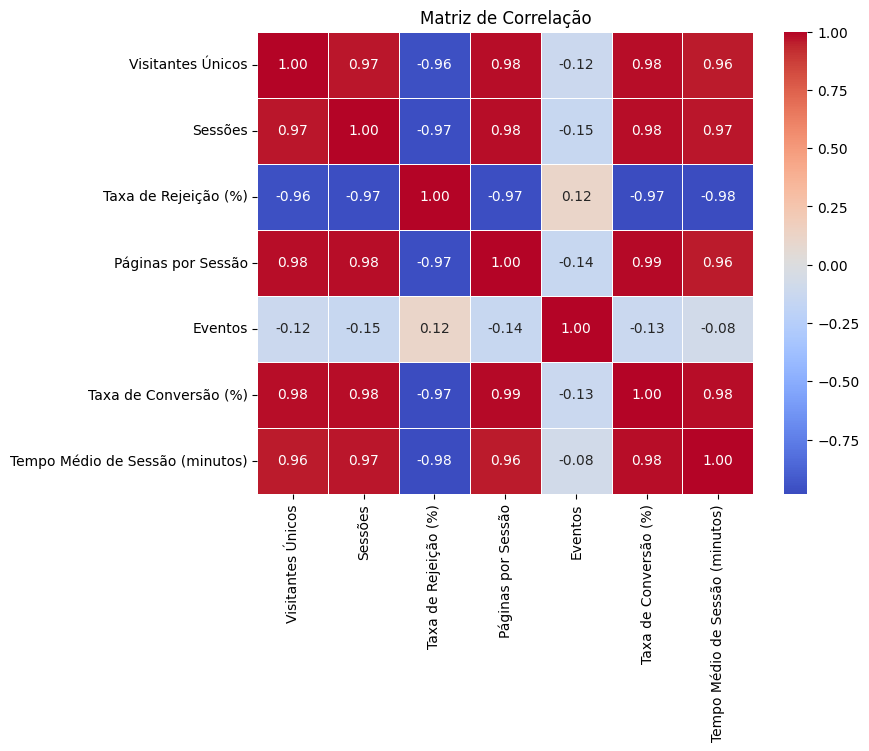

In [31]:
visualizacao = calcular_e_visualizar_correlacoes(df)
visualizacao

##### Variáveis mais relevantes para a conversão de vendas

In [34]:
df_especificas = ['Visitantes Únicos', 'Sessões', 'Taxa de Rejeição (%)', 'Eventos', 'Tempo Médio de Sessão (minutos)']
#Filtrando para as variáveis mais importantes
df_vendas = df[df.isin(df_especificas)]

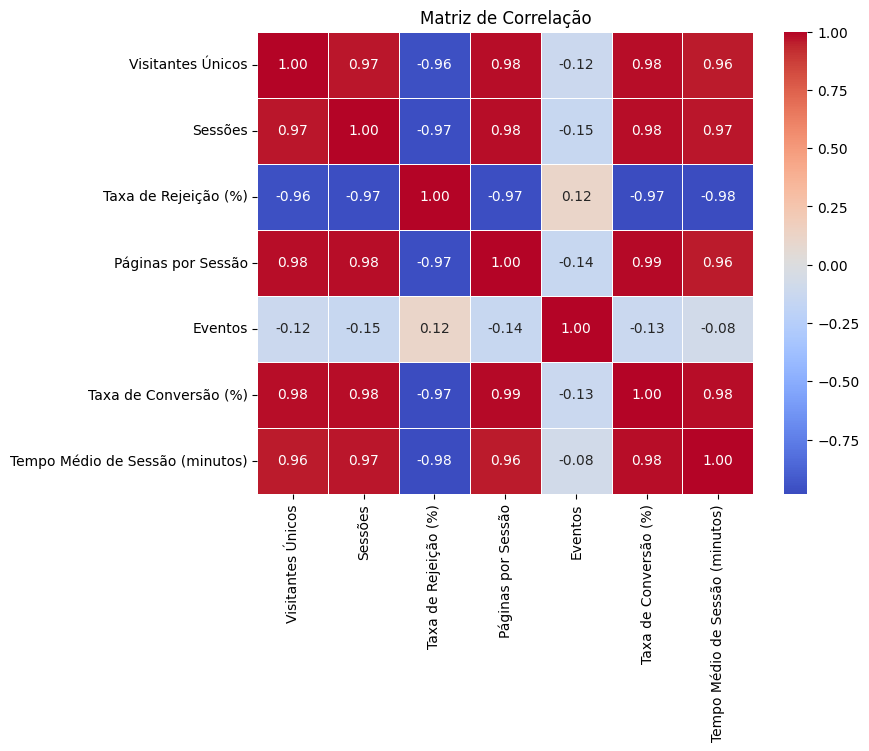

In [35]:
visualizacao = calcular_e_visualizar_correlacoes(df)
visualizacao

#### Alguns outros Graficos

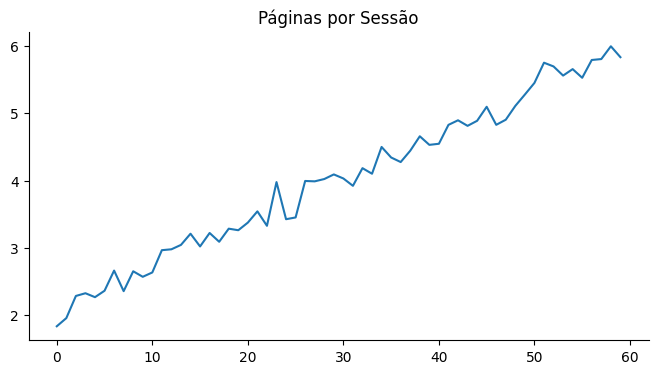

In [37]:
df['Páginas por Sessão'].plot(kind='line', figsize=(8, 4), title='Páginas por Sessão')
plt.gca().spines[['top', 'right']].set_visible(False)

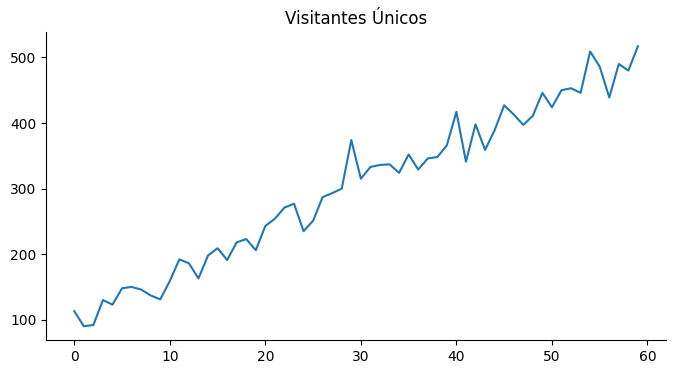

In [38]:
df['Visitantes Únicos'].plot(kind='line', figsize=(8, 4), title='Visitantes Únicos')
plt.gca().spines[['top', 'right']].set_visible(False)

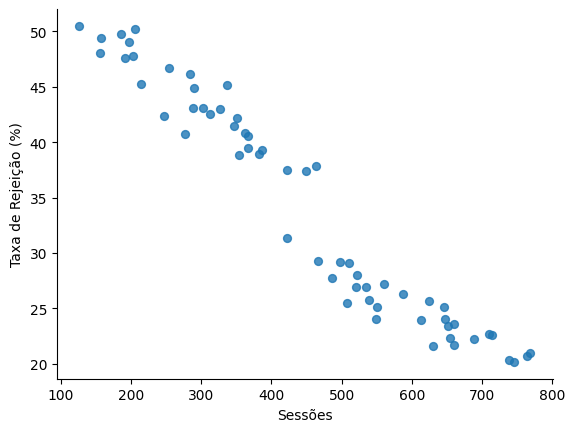

In [39]:
df.plot(kind='scatter', x='Sessões', y='Taxa de Rejeição (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

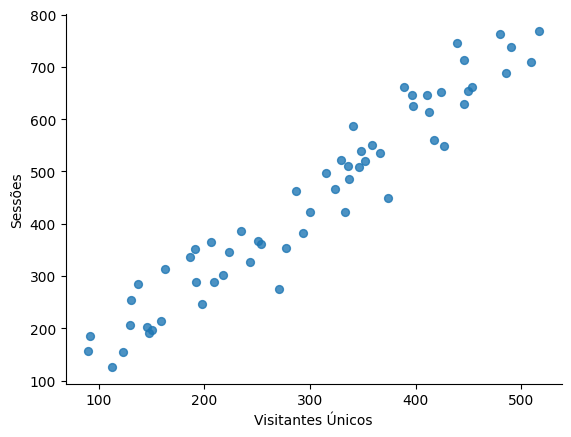

In [40]:
df.plot(kind='scatter', x='Visitantes Únicos', y='Sessões', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

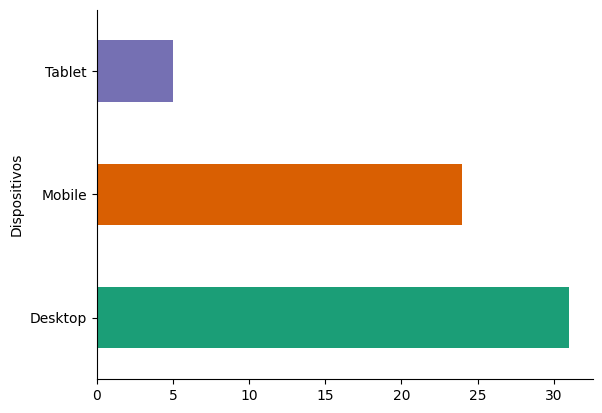

In [41]:
df.groupby('Dispositivos').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

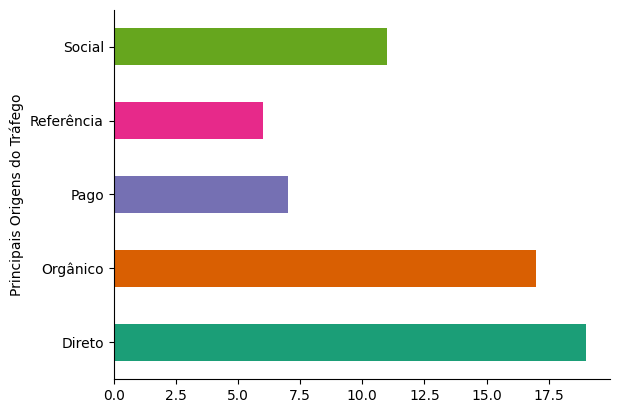

In [42]:
df.groupby('Principais Origens do Tráfego').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

**OBJETIVO**: Simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma.


**ESTRATÉGIA DE IMPLEMENTAÇÃO**
1. Determinar a média e o desvio padrão
2. Configurar os parâmetros da simulação
3. Definir a distribuição probabilística
4. Implementar a simulação
5. Analisar os Resultados

**IMPLEMENTAÇÃO**

In [47]:
df.head()

,Data,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Principais Origens do Tráfego,Dispositivos,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
0,2023-01-01,113.0,126.0,50.496714,1.834201,Direto,Desktop,8,1.952083,5.395516
1,2023-01-02,90.0,157.0,49.438007,1.955760,Social,Desktop,5,2.066180,4.680899
2,2023-01-03,92.0,185.0,49.800231,2.285052,Direto,Desktop,9,2.058858,5.972584
3,2023-01-04,130.0,206.0,50.251843,2.325464,Pago,Mobile,6,2.134617,4.705854
4,2023-01-05,123.0,155.0,48.070931,2.267006,Direto,Desktop,6,2.420236,5.835801


#### Aqui temos um exemplo utilizando o tempo médio de sessão
Estou fazendo uma verificação da influência do tempo médio de sessão, que está em minutos, para isso peguei dois períodos que consistem na média e na variância analisada

- Com isso, podemos inferir que em entre 9 e 12 minutos é o tempo de tela "ideal", ou mais provável que os nossos usuários irão passar.

In [45]:
# DataFrame que contém a 'Tempo Médio de Sessão (minutos)'
tempos_sessao = df['Tempo Médio de Sessão (minutos)']

# Para a simulação, suponhamos que temos dois períodos: a média e a variância
tempos_antes = tempos_sessao[:10]
tempos_depois = tempos_sessao[12:]

# Calculando a média e desvio padrão antes e depois da mudança
media_antes = np.mean(tempos_antes)
desvio_padrao_antes = np.std(tempos_antes, ddof=1)
media_depois = np.mean(tempos_depois)
desvio_padrao_depois = np.std(tempos_depois, ddof=1)

# Impacto estimado da mudança anterior
impacto_estimado = (media_depois - media_antes) / media_antes

# Usando esse impacto para estimar o efeito de uma nova mudança similar
nova_media = media_antes * (1 + impacto_estimado)
novo_desvio_padrao = desvio_padrao_antes * (1 + impacto_estimado)

# Simulando 1000 cenários de Monte Carlo com os novos parâmetros
simulacoes = np.random.normal(nova_media, novo_desvio_padrao, 1000)

# Calculando os intervalos de confiança de 95%
percentil_2_5 = np.percentile(simulacoes, 2.5)
percentil_97_5 = np.percentile(simulacoes, 97.5)

# Criar DataFrame para o Plotly
data = pd.DataFrame({
    'Simulações': simulacoes
})

# Criando o gráfico com Plotly Express
fig = px.histogram(data, x='Simulações', nbins=30, title='Impacto do Tempo Médio de Sessão')
fig.add_vline(x=media_antes, line_dash="dash", line_color="red", annotation_text="Média Antes")
fig.add_vline(x=nova_media, line_dash="dash", line_color="green", annotation_text="Projeção da Nova Média")
fig.add_vline(x=percentil_2_5, line_dash="dot", line_color="orange", annotation_text="2.5% Percentil")
fig.add_vline(x=percentil_97_5, line_dash="dot", line_color="orange", annotation_text="97.5% Percentil")
fig.update_layout(xaxis_title='Tempo Médio de Visita (minutos)', yaxis_title='Frequência', legend_title_text='Legenda')
fig.show()

#### Aqui temos um exemplo utilizando de taxa de rejeição após possíveis mudanças, via data

In [51]:
# DataFrame que contém as colunas 'Data' e 'Taxa de Rejeição'
data_inicio_mudancas = pd.Timestamp('2023-01-29')
df['Data'] = df['Data'].astype('datetime64[ns]')

# Separar dados antes e depois das mudanças
df_antes = df[df['Data'] < data_inicio_mudancas]
df_depois = df[df['Data'] >= data_inicio_mudancas]

# Calcular estatísticas para a taxa de rejeição
media_antes_rejeicao = df_antes['Taxa de Rejeição (%)'].mean()
media_depois_rejeicao = df_depois['Taxa de Rejeição (%)'].mean()
std_antes_rejeicao = df_antes['Taxa de Rejeição (%)'].std()
std_depois_rejeicao = df_depois['Taxa de Rejeição (%)'].std()

# Função de simulação que separa as contribuições de UI e velocidade
def simular_impacto_detalhado(n_simulacoes):
    resultados_rejeicao = []
    detalhes_contribuicoes = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)
        contribuicao_velocidade = np.random.uniform(0, 1 - contribuicao_ui)  # Garante que a soma não ultrapassa 100%

        ajuste_por_ui = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_ui
        ajuste_por_velocidade = (media_depois_rejeicao - media_antes_rejeicao) * contribuicao_velocidade

        nova_taxa_rejeicao = np.random.normal(media_antes_rejeicao + ajuste_por_ui + ajuste_por_velocidade, std_depois_rejeicao)
        resultados_rejeicao.append(nova_taxa_rejeicao)
        detalhes_contribuicoes.append((contribuicao_ui, contribuicao_velocidade, abs(ajuste_por_ui), abs(ajuste_por_velocidade)))

    return resultados_rejeicao, detalhes_contribuicoes

# Executar simulação
n_simulacoes = 10000
resultados_rejeicao_simulada, contribuicoes_simuladas = simular_impacto_detalhado(n_simulacoes)

# Criar DataFrame para os resultados das simulações
data_resultados = pd.DataFrame({
    'Taxas de Rejeição Simuladas': resultados_rejeicao_simulada
})

# Histograma das Taxas de Rejeição Simuladas
fig_rejeicao = px.histogram(data_resultados, x='Taxas de Rejeição Simuladas', nbins=50,
                            title='Distribuição das Taxas de Rejeição Simuladas após Mudanças',
                            labels={'Taxas de Rejeição Simuladas': 'Taxa de Rejeição (%)'},
                            opacity=0.8)
fig_rejeicao.add_vline(x=media_antes_rejeicao, line_dash="dash", line_color="red", annotation_text="Média Antes")
fig_rejeicao.add_vline(x=media_depois_rejeicao, line_dash="dash", line_color="green", annotation_text="Média Depois")
fig_rejeicao.update_layout(xaxis_title='Taxa de Rejeição (%)', yaxis_title='Frequência')
fig_rejeicao.show()

# Criar DataFrame para os detalhes das contribuições
contrib_data = pd.DataFrame(contribuicoes_simuladas, columns=['Contribuição UI', 'Contribuição Velocidade', 'Ajuste por UI', 'Ajuste por Velocidade'])

# Gráfico de dispersão das contribuições
fig_contrib = px.scatter(contrib_data, x='Contribuição UI', y='Contribuição Velocidade',
                         size='Ajuste por UI', color='Ajuste por Velocidade',
                         title='Contribuições de UI e Velocidade às Taxas de Rejeição Simuladas',
                         labels={'Contribuição UI': 'Contribuição UI (%)',
                                 'Contribuição Velocidade': 'Contribuição Velocidade (%)'})
fig_contrib.update_layout(xaxis_title='Contribuição UI (%)', yaxis_title='Contribuição Velocidade (%)')
fig_contrib.show()

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

##### Tempo de Sessão vs Taxa de Conversão

In [52]:
fig = px.scatter(
    df,
    x="Tempo Médio de Sessão (minutos)",
    y="Taxa de Conversão (%)",
    trendline="ols",  # Adiciona uma linha de regressão linear ordinária ('ordinary least squares')
    title="Relação entre Tempo de Sessão e Taxa de Conversão",
    labels={"Tempo Médio de Sessão (minutos)": "Tempo Médio de Sessão (min)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Tempo Médio de Sessão (min)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

##### Taxa de Rejeição vs Taxa de Conversão

In [53]:
fig = px.scatter(
    df,
    x="Taxa de Rejeição (%)",
    y="Taxa de Conversão (%)",
    trendline="ols",  # Adiciona uma linha de regressão linear ('ordinary least squares')
    title="Relação entre Taxa de Rejeição e Taxa de Conversão",
    labels={"Taxa de Rejeição (%)": "Taxa de Rejeição (%)",
            "Taxa de Conversão (%)": "Taxa de Conversão (%)"}
)
fig.update_layout(
    xaxis_title="Taxa de Rejeição (%)",
    yaxis_title="Taxa de Conversão (%)",
    height=500,
    width=800
)
fig.show()

#### Análise das correlações

In [54]:
corr_df = df.filter(['Taxa de Rejeição (%)', 'Taxa de Conversão (%)', 'Tempo Médio de Sessão (minutos)'])
corr_df.corr()

,Taxa de Rejeição (%),Taxa de Conversão (%),Tempo Médio de Sessão (minutos)
Taxa de Rejeição (%),1.000000,-0.974824,-0.982036
Taxa de Conversão (%),-0.974824,1.000000,0.976846
Tempo Médio de Sessão (minutos),-0.982036,0.976846,1.000000


- taxa de conversão para os próximos 12 meses, assumindo um aumento gradual no tempo médio de sessão de 1 minuto por mês, começando de 5 minutos.

In [55]:
# Definição dos parâmetros do modelo
coef_tempo_sessao = 0.37787
intercepto = 0.974824

# Intervalo de tempo de sessão de 5 a 16 minutos
tempos_de_sessao = range(9, 12)

# Calculando a taxa de conversão para cada tempo de sessão
for tempo in tempos_de_sessao:
    taxa_de_conversao = coef_tempo_sessao * tempo + intercepto
    print(f"Tempo de Sessão: {tempo} minutos, Taxa de Conversão: {taxa_de_conversao:.2f}%")

Tempo de Sessão: 9 minutos, Taxa de Conversão: 4.37%
Tempo de Sessão: 10 minutos, Taxa de Conversão: 4.75%
Tempo de Sessão: 11 minutos, Taxa de Conversão: 5.13%


## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.